In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns # contains barplot
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LassoCV # lasso linear model with cross-validation
from sklearn.ensemble import RandomForestRegressor # random forest
from sklearn.ensemble import GradientBoostingRegressor # gradient boosting
from sklearn.neural_network import MLPRegressor # multiplayer perceptron

# Reading the data

In [2]:
# reading the data
csv_arctic = "https://raw.githubusercontent.com/theiresearch/ArcticSeaIce/main/data/arctic_data.csv"
df = pd.read_csv(csv_arctic)
df.head()

,observation,year,month,date,Extent,Rainfall,Daylight,Population,CO2,Ozone,OceanTemperature_NorthernHemisphere,LandTemperature_NorthernHemisphere,MaxTemperature_NorthSlopeAlaska,AvgTemperature_NorthSlopeAlaska,MinTemperature_NorthSlopeAlaska,GDP_WORLD,ArcticIceVolume
0,1,1980,1,01/01/1980,0.902,0.10,0.080,0.0000,0.02163,0.52800,0.3516,0.2932,0.2115,0.2016,0.1895,0.000000,0.799170
1,2,1980,2,01/02/1980,0.990,0.10,0.264,0.0020,0.02706,0.78602,0.3281,0.3784,0.3101,0.2887,0.2608,0.001349,0.892699
2,3,1980,3,01/03/1980,0.996,0.00,0.454,0.0040,0.04770,0.87686,0.2969,0.1930,0.3068,0.2978,0.2854,0.002698,0.962674
3,4,1980,4,01/04/1980,0.947,0.05,0.649,0.0059,0.05907,0.86664,0.2188,0.3484,0.4042,0.3975,0.3860,0.004047,1.000000
4,5,1980,5,01/05/1980,0.816,0.20,0.851,0.0079,0.06587,0.70773,0.2813,0.3559,0.6390,0.6552,0.6632,0.005395,0.984952


In [3]:
df.describe()

,observation,year,month,Extent,Rainfall,Daylight,Population,CO2,Ozone,OceanTemperature_NorthernHemisphere,LandTemperature_NorthernHemisphere,MaxTemperature_NorthSlopeAlaska,AvgTemperature_NorthSlopeAlaska,MinTemperature_NorthSlopeAlaska,GDP_WORLD,ArcticIceVolume
count,490.00000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,245.50000,1999.918367,6.479592,0.624090,0.346327,0.493069,0.502713,0.443966,0.393414,0.458664,0.466685,0.536654,0.545104,0.546334,0.408513,0.539257
std,141.59508,11.798993,3.447620,0.260269,0.311400,0.324229,0.289257,0.270967,0.245841,0.214461,0.148151,0.263396,0.271594,0.277091,0.321781,0.250732
min,1.00000,1980.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,123.25000,1990.000000,3.250000,0.398250,0.100000,0.264000,0.258950,0.218150,0.170292,0.289100,0.359025,0.291575,0.288700,0.283000,0.137838,0.353139
50%,245.50000,2000.000000,6.000000,0.681000,0.225000,0.517000,0.504600,0.413865,0.368090,0.429700,0.461200,0.499400,0.498850,0.497650,0.295927,0.552475
75%,367.75000,2010.000000,9.000000,0.857000,0.587500,0.816500,0.750050,0.666030,0.598325,0.601600,0.566400,0.800675,0.823575,0.831000,0.695840,0.743685
max,490.00000,2020.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Check if have missing data

In [4]:
# missing data?
df.isna().head()

,observation,year,month,date,Extent,Rainfall,Daylight,Population,CO2,Ozone,OceanTemperature_NorthernHemisphere,LandTemperature_NorthernHemisphere,MaxTemperature_NorthSlopeAlaska,AvgTemperature_NorthSlopeAlaska,MinTemperature_NorthSlopeAlaska,GDP_WORLD,ArcticIceVolume
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isna().mean()
# missing data? No.

observation                            0.0
year                                   0.0
month                                  0.0
date                                   0.0
Extent                                 0.0
Rainfall                               0.0
Daylight                               0.0
Population                             0.0
CO2                                    0.0
Ozone                                  0.0
OceanTemperature_NorthernHemisphere    0.0
LandTemperature_NorthernHemisphere     0.0
MaxTemperature_NorthSlopeAlaska        0.0
AvgTemperature_NorthSlopeAlaska        0.0
MinTemperature_NorthSlopeAlaska        0.0
GDP_WORLD                              0.0
ArcticIceVolume                        0.0
dtype: float64

# Variables - x

In [6]:
arctic = df[['Rainfall', 'Daylight', 'Population', \
                'CO2', 'Ozone', 'OceanTemperature_NorthernHemisphere', \
                'LandTemperature_NorthernHemisphere', 'MinTemperature_NorthSlopeAlaska', \
                'GDP_WORLD']]
arctic.describe()

,Rainfall,Daylight,Population,CO2,Ozone,OceanTemperature_NorthernHemisphere,LandTemperature_NorthernHemisphere,MinTemperature_NorthSlopeAlaska,GDP_WORLD
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,0.346327,0.493069,0.502713,0.443966,0.393414,0.458664,0.466685,0.546334,0.408513
std,0.311400,0.324229,0.289257,0.270967,0.245841,0.214461,0.148151,0.277091,0.321781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100000,0.264000,0.258950,0.218150,0.170292,0.289100,0.359025,0.283000,0.137838
50%,0.225000,0.517000,0.504600,0.413865,0.368090,0.429700,0.461200,0.497650,0.295927
75%,0.587500,0.816500,0.750050,0.666030,0.598325,0.601600,0.566400,0.831000,0.695840
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Target - y

In [7]:
extent = df[['Extent']]
extent.describe()

,Extent
count,490.000000
mean,0.624090
std,0.260269
min,0.000000
25%,0.398250
50%,0.681000
75%,0.857000
max,1.000000


# Split dataset to 1:9 for testing and training

In [8]:
# split traing set and testing set to 9:1 (441:49):
X_train, X_val, y_train, y_val = train_test_split(arctic, extent, test_size=0.1, \
                                                                    train_size=0.9, random_state=7)
X_train.shape, X_val.shape

((441, 9), (49, 9))

# For saving results (R2, Explained Variance, MSE, MAE)

In [9]:
experiments = []
metric_names = []
metric_vals = []

# Tracking experiment results

In [10]:
# tracking experiment results
def plot_preds(y_pred, y_val):
    '''Plot predictions vs labels on a scatter plot.'''
    lines_color = plt.rcParams['text.color']
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    plt.plot([0, 1], [0, 1], c='red', zorder=1)
    plt.scatter(y_val, y_pred, alpha=0.6, edgecolors=lines_color, c='#5EC2FF')
    #ax.set_aspect('equal', adjustable='box')
    ax.grid(linestyle='--')
    plt.xlabel('True value')
    plt.ylabel('Predictions')
    plt.show()

def calc_metrics(y_pred, y_val):
    '''Print 4 metrics using predictions and labels.'''
    r2 = r2_score(y_val, y_pred)
    ev = explained_variance_score(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    return r2, ev, mse, mae

# Lasso multiple linear regression (MLR) model with cross validation (CV)

/Users/realgjl/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:1561: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: LassoCV(cv=10, n_alphas=1000, random_state=0)
Predictions: (49,)


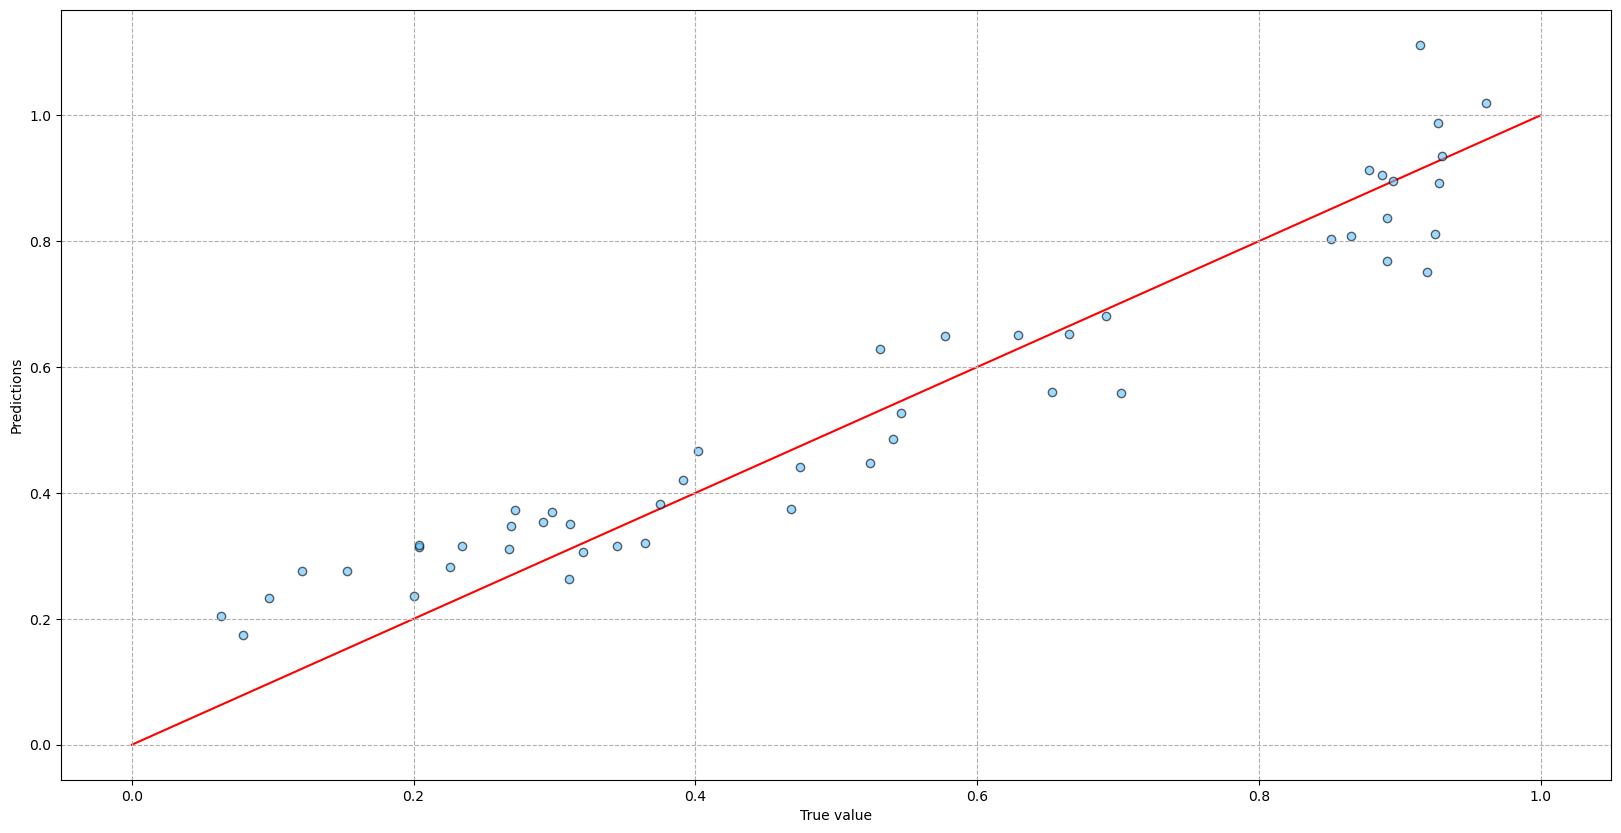

R2 Score: 0.916706675
Explained Variance Score: 0.920295045
MSE: 0.006923865
MAE: 0.068929556
5.3278339712465475e-05


In [11]:
lassoMLR_cv_model = LassoCV(
    cv=10, random_state=0, n_alphas=1000
).fit(X_train, y_train)
y_pred = lassoMLR_cv_model.predict(X_val)
print(f'Model: {lassoMLR_cv_model}')
print(f'Predictions: {y_pred.shape}')

# plot
plot_preds(y_pred, y_val)
r2, ev, mse, mae = calc_metrics(y_pred, y_val)
print(f'R2 Score: {r2:.9f}')
print(f'Explained Variance Score: {ev:.9f}')
print(f'MSE: {mse:.9f}')
print(f'MAE: {mae:.9f}')
# Update overall results, if we haven't already:
if 'LassoLinearModel' not in experiments:
    experiments.extend(['LassoLinearModel']*4)
    metric_names.extend(['R2', 'Explained Variance', 'MSE', 'MAE'])
    metric_vals.extend([r2, ev, mse, mae])


print(lassoMLR_cv_model.alpha_)

# Polynomial Lasso MLR model with CV

/Users/realgjl/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:1561: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/realgjl/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.270e-02, tolerance: 2.846e-03
  model = cd_fast.enet_coordinate_descent(


Model: LassoCV(cv=10, n_alphas=1000, random_state=0)
Predictions: (49,)


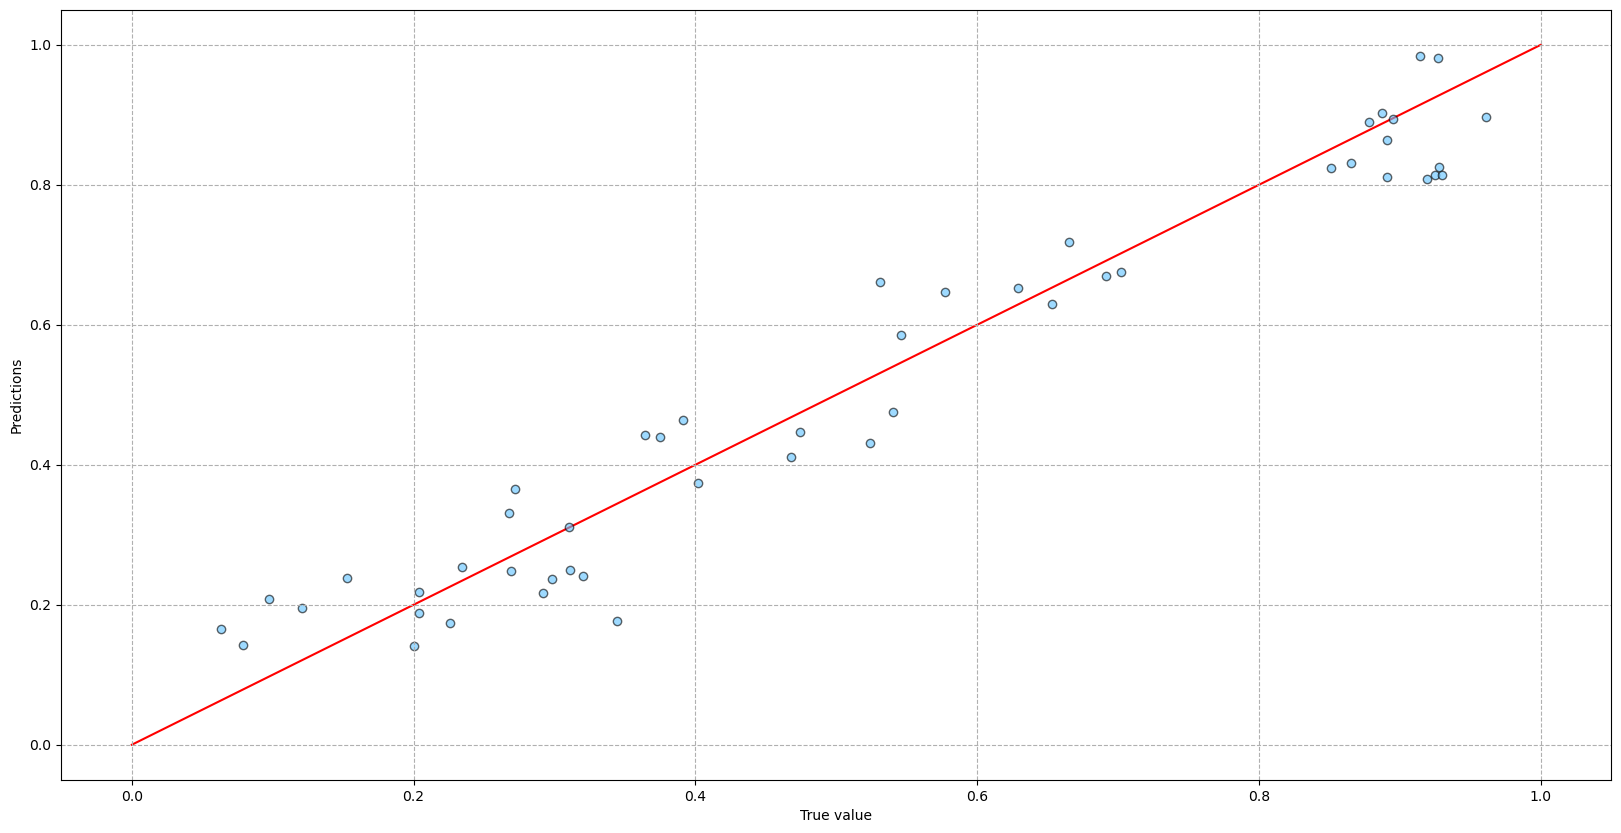

R2 Score: 0.941503316
Explained Variance Score: 0.941943088
MSE: 0.004862612
MAE: 0.059527616
5.3278339712465475e-05


In [12]:
csv_poly = "https://raw.githubusercontent.com/theiresearch/ArcticSeaIce/main/data/poly.csv"
poly_df = pd.read_csv(csv_poly)
poly_arctic = poly_df[['Rainfall', 'Rainfall^2', 'Rainfall^3', 'Rainfall^4', \
                        'Daylight', 'Daylight^2', 'Daylight^3', 'Daylight^4', 
                        'Ozone', 'Ozone^2', 'Ozone^3', 'Ozone^4', 
                        'MinTemp', 'MinTemp^2', 'MinTemp^3', 'MinTemp^4']]
#poly_arctic.describe()
poly_extent = poly_df[['Extent']]
# split traing set and testing set to 9:1 (441:49):
poly_X_train, poly_X_val, poly_y_train, poly_y_val = train_test_split(poly_arctic, poly_extent, test_size=0.1, \
                                                                    train_size=0.9, random_state=7)
poly_X_train.shape, poly_X_val.shape


poly_lassoMLR_cv_model = LassoCV(
    cv=10, random_state=0, n_alphas=1000
).fit(poly_X_train, poly_y_train)
poly_y_pred = poly_lassoMLR_cv_model.predict(poly_X_val)
print(f'Model: {poly_lassoMLR_cv_model}')
print(f'Predictions: {poly_y_pred.shape}')

# plot
plot_preds(poly_y_pred, poly_y_val)
r2, ev, mse, mae = calc_metrics(poly_y_pred, poly_y_val)
print(f'R2 Score: {r2:.9f}')
print(f'Explained Variance Score: {ev:.9f}')
print(f'MSE: {mse:.9f}')
print(f'MAE: {mae:.9f}')
# Update overall results, if we haven't already:
if 'PolynomialLassoLinearModel' not in experiments:
    experiments.extend(['PolynomialLassoLinearModel']*4)
    metric_names.extend(['R2', 'Explained Variance', 'MSE', 'MAE'])
    metric_vals.extend([r2, ev, mse, mae])


print(poly_lassoMLR_cv_model.alpha_)

# Random Forest Model

/var/folders/tq/gf6ls925115gkx5bmf_j8p700000gn/T/ipykernel_32747/3015133653.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model = RandomForestRegressor(


Model: RandomForestRegressor(max_depth=20, n_estimators=2000, random_state=7)
Predictions: (49,)


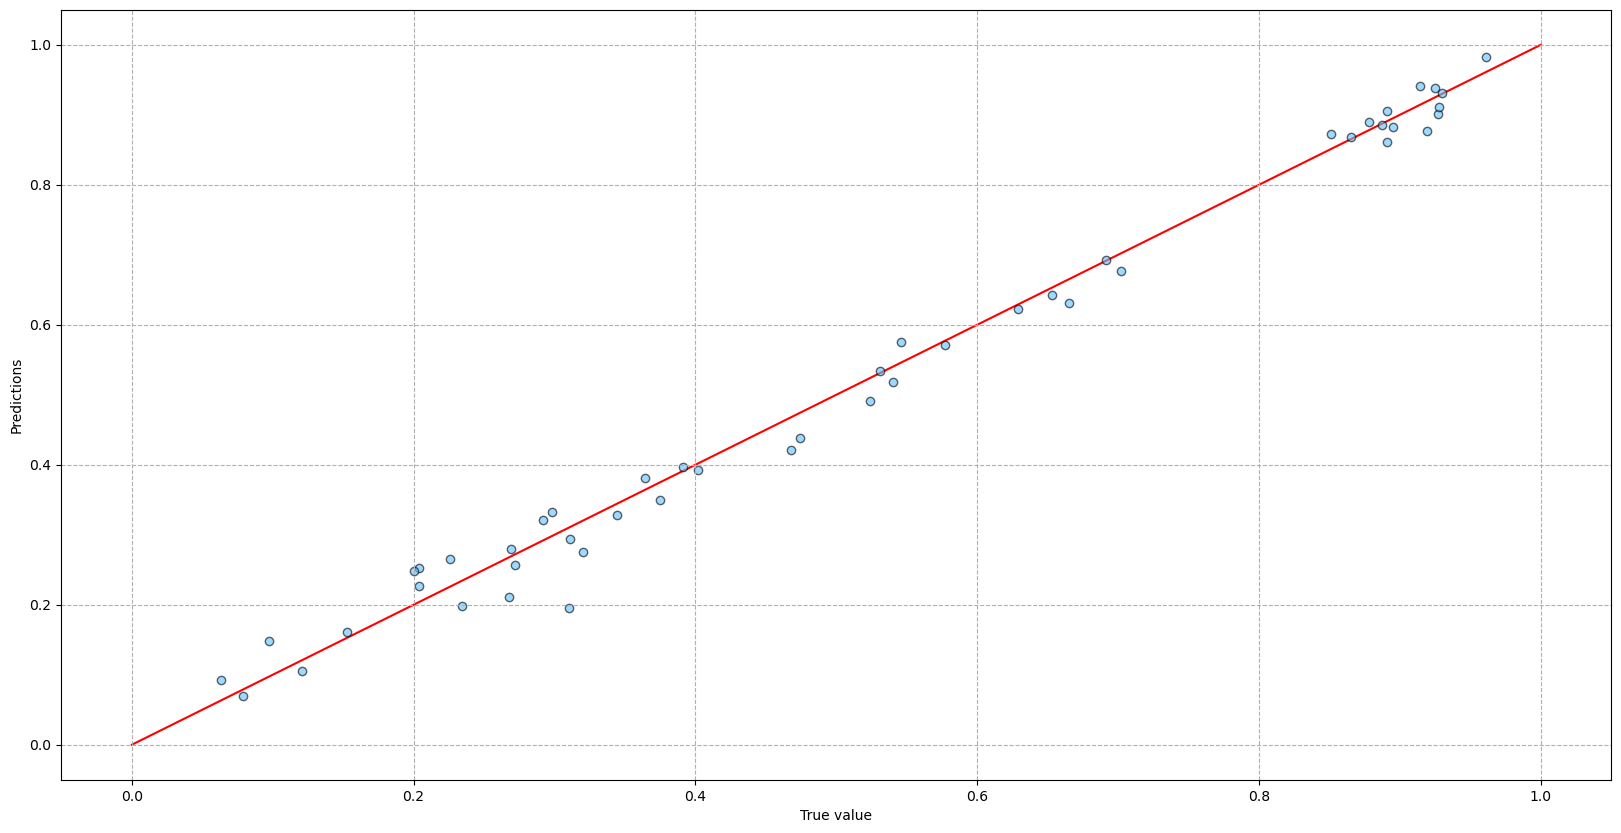

R2 Score: 0.988161681
Explained Variance Score: 0.988393751
MSE: 0.000984075
MAE: 0.024542347


In [13]:
random_forest_model = RandomForestRegressor(
    n_estimators=2000,
    max_depth=20,
    random_state=7
).fit(X_train, y_train)
y_pred = random_forest_model.predict(X_val)
print(f'Model: {random_forest_model}')
print(f'Predictions: {y_pred.shape}')

#plot
plot_preds(y_pred, y_val)
r2, ev, mse, mae = calc_metrics(y_pred, y_val)
print(f'R2 Score: {r2:.9f}')
print(f'Explained Variance Score: {ev:.9f}')
print(f'MSE: {mse:.9f}')
print(f'MAE: {mae:.9f}')
# Update overall results, if we haven't already:
if 'RandomForestModel' not in experiments:
    experiments.extend(['RandomForestModel']*4)
    metric_names.extend(['R2', 'Explained Variance', 'MSE', 'MAE'])
    metric_vals.extend([r2, ev, mse, mae])

# Optimizing Multilayer Perceptron (MLP) hyperparameter

/Users/realgjl/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/realgjl/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model: MLPRegressor(batch_size=32, hidden_layer_sizes=(10, 10, 10, 10, 10, 10),
             random_state=0, solver='lbfgs')
Predictions: (49,)


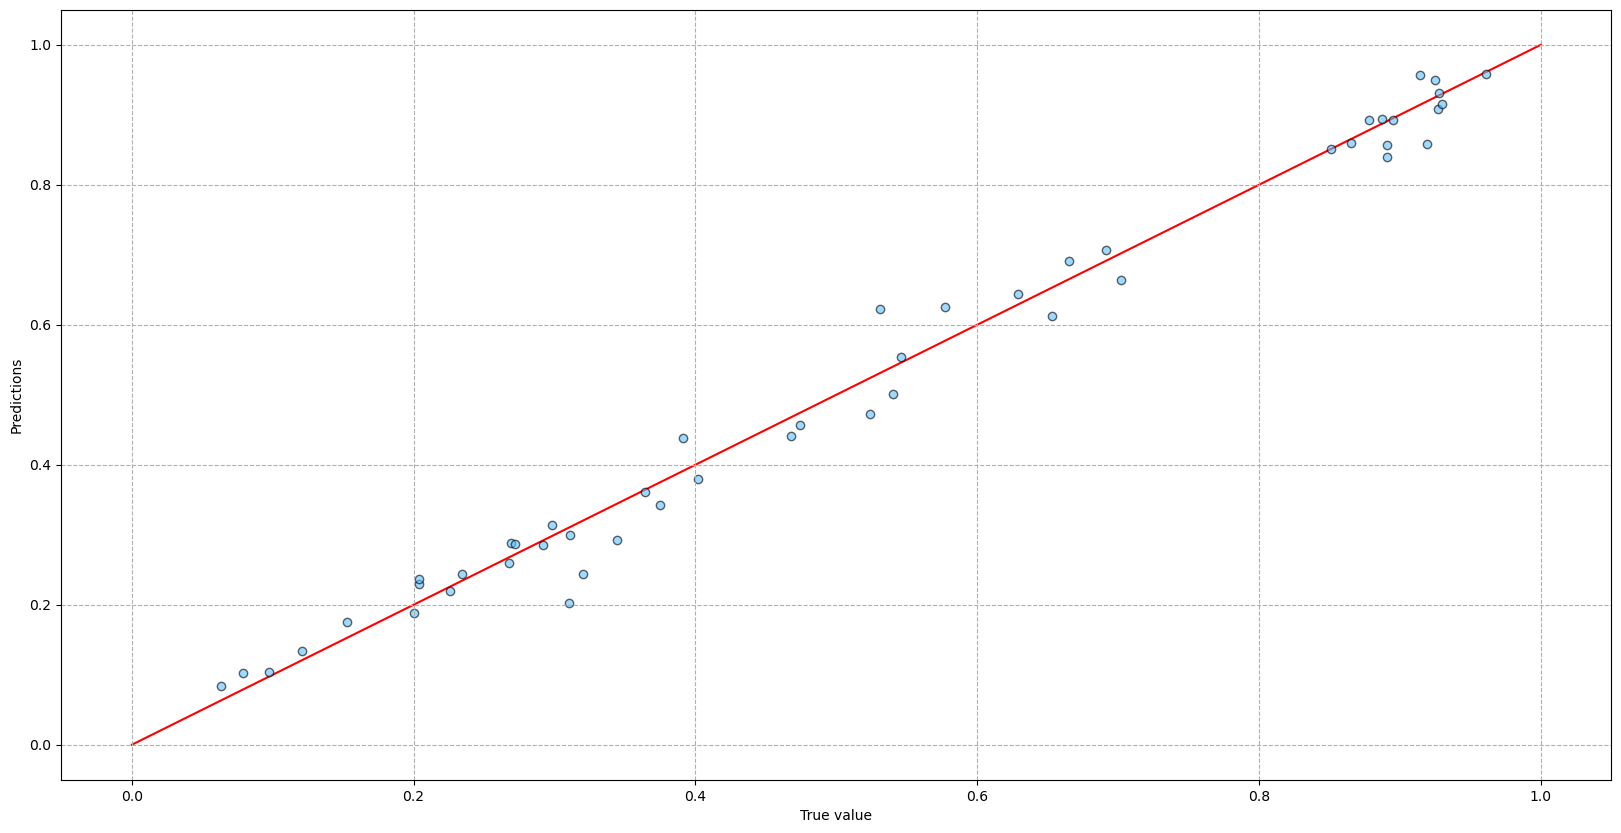

R2 Score: 0.985386583
Explained Variance Score: 0.985574201
MSE: 0.001214759
MAE: 0.026328995


In [14]:
# optimizing MLP hyperparameter
nn = MLPRegressor(
    hidden_layer_sizes=(10,10,10,10,10,10), 
    batch_size=32,
    activation='relu',
    solver='lbfgs', #lbfgs, sgd, adam
    random_state=0,
).fit(X_train, y_train)
y_pred = nn.predict(X_val)
print(f'Model: {nn}')
print(f'Predictions: {y_pred.shape}')

# plot
plot_preds(y_pred, y_val)
r2, ev, mse, mae = calc_metrics(y_pred, y_val)
print(f'R2 Score: {r2:.9f}')
print(f'Explained Variance Score: {ev:.9f}')
print(f'MSE: {mse:.9f}')
print(f'MAE: {mae:.9f}')
# Update overall results, if we haven't already:
if 'AdvancedNN' not in experiments:
    experiments.extend(['AdvancedNN']*4)
    metric_names.extend(['R2', 'Explained Variance', 'MSE', 'MAE'])
    metric_vals.extend([r2, ev, mse, mae])

# Comparing models

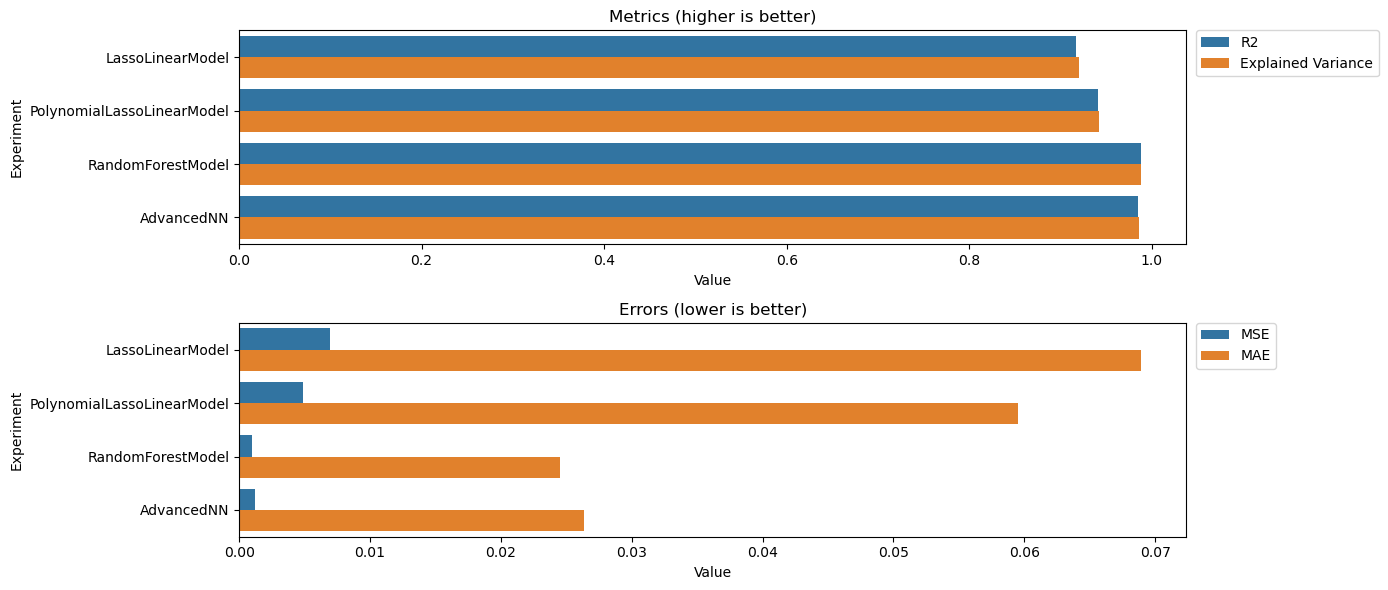

                    Experiment              Metric     Value
0             LassoLinearModel                  R2  0.916707
1             LassoLinearModel  Explained Variance  0.920295
2             LassoLinearModel                 MSE  0.006924
3             LassoLinearModel                 MAE  0.068930
4   PolynomialLassoLinearModel                  R2  0.941503
5   PolynomialLassoLinearModel  Explained Variance  0.941943
6   PolynomialLassoLinearModel                 MSE  0.004863
7   PolynomialLassoLinearModel                 MAE  0.059528
8            RandomForestModel                  R2  0.988162
9            RandomForestModel  Explained Variance  0.988394
10           RandomForestModel                 MSE  0.000984
11           RandomForestModel                 MAE  0.024542
12                  AdvancedNN                  R2  0.985387
13                  AdvancedNN  Explained Variance  0.985574
14                  AdvancedNN                 MSE  0.001215
15                  Adva

In [15]:
# comparing models
df_res = pd.DataFrame()
df_res['Experiment'] = experiments
df_res['Metric'] = metric_names
df_res['Value'] = metric_vals
#df_res.head()

# barplot metrics and errors
fig, axes = plt.subplots(2, 1, figsize=(14, 6))
sns.barplot(
    data=df_res[df_res.Metric.isin(['R2', 'Explained Variance'])],
    orient='h',
    x='Value',
    y='Experiment',
    hue='Metric',
    ax=axes[0]
)
axes[0].set_title('Metrics (higher is better)')
axes[0].legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
sns.barplot(
    data=df_res[~df_res.Metric.isin(['R2', 'Explained Variance'])],
    orient='h',
    x='Value',
    y='Experiment',
    hue='Metric',
    ax=axes[1],
)
axes[1].set_title('Errors (lower is better)')
axes[1].legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

print(df_res)